In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# source: https://download.bls.gov/pub/time.series/ap/
# save ap.data.3.food as a txt file
apfood = pd.read_csv('ap.data.3.food.txt', sep = '\t')

/Users/joyharjanto/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
apfood.series_id = apfood.series_id.str.strip() # remove whitespace from series_id

In [4]:
# Read section 4 of https://download.bls.gov/pub/time.series/ap/ap.txt
# for how to understand the series_id
# We extract the itemcode from the series_id and create a new column called 'item_code'
apfood['item_code'] = apfood.series_id.str[-6:]

In [5]:
print(apfood.head())

       series_id  year period         value footnote_codes item_code
0  APU0000701111  1980    M01         0.203                   701111
1  APU0000701111  1980    M02         0.205                   701111
2  APU0000701111  1980    M03         0.211                   701111
3  APU0000701111  1980    M04         0.206                   701111
4  APU0000701111  1980    M05         0.207                   701111


In [6]:
# source: https://download.bls.gov/pub/time.series/ap/
# save ap.item as a txt file
apitem = pd.read_csv('ap.item.txt', sep = '\t')

In [7]:
print(apitem.head())

  item_code                                          item_name
0    701111      Flour, white, all purpose, per lb. (453.6 gm)
1    701311  Rice, white, long grain, precooked (cost per p...
2    701312  Rice, white, long grain, uncooked, per lb. (45...
3    701321             Spaghetti (cost per pound/453.6 grams)
4    701322         Spaghetti and macaroni, per lb. (453.6 gm)


In [8]:
food = pd.merge(apfood, apitem, on = 'item_code')

In [9]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132195 entries, 0 to 132194
Data columns (total 7 columns):
series_id         132195 non-null object
year              132195 non-null int64
period            132195 non-null object
value             132195 non-null object
footnote_codes    132195 non-null object
item_code         132195 non-null object
item_name         132195 non-null object
dtypes: int64(1), object(6)
memory usage: 8.1+ MB


In [10]:
print(food)

            series_id  year period         value footnote_codes item_code  \
0       APU0000701111  1980    M01         0.203                   701111   
1       APU0000701111  1980    M02         0.205                   701111   
2       APU0000701111  1980    M03         0.211                   701111   
3       APU0000701111  1980    M04         0.206                   701111   
4       APU0000701111  1980    M05         0.207                   701111   
5       APU0000701111  1980    M06         0.210                   701111   
6       APU0000701111  1980    M07         0.214                   701111   
7       APU0000701111  1980    M08         0.215                   701111   
8       APU0000701111  1980    M09         0.214                   701111   
9       APU0000701111  1980    M10         0.212                   701111   
10      APU0000701111  1980    M11         0.211                   701111   
11      APU0000701111  1980    M12         0.211                   701111   

# Start here with your answer to question 1:

In [12]:
list(food)

['series_id',
 'year',
 'period',
 'value',
 'footnote_codes',
 'item_code',
 'item_name']

In [14]:
food['series_id'].head()


0    APU0000701111
1    APU0000701111
2    APU0000701111
3    APU0000701111
4    APU0000701111
Name: series_id, dtype: object

In [35]:
food['area']=[food['series_id'][i][3:7] for i in range(0,len(food['series_id']))]

#food['area'].head()
list(food) # to check


['series_id',
 'year',
 'period',
 'value',
 'footnote_codes',
 'item_code',
 'item_name',
 'area',
 'season']

In [36]:
food['area'].unique()

array(['0000', '0100', '0200', '0300', '0400'], dtype=object)

In [26]:
food['season']=[food['series_id'][i][2] for i in range(0,len(food['series_id']))]

food['season'].head()
#list(food)


0    U
1    U
2    U
3    U
4    U
Name: season, dtype: object

In [27]:
food['season'].unique()

array(['U'], dtype=object)

In [132]:

new_food=food
print(food.shape)
result2 = (food['item_code']=='711111') | (food['item_code']=='711211') | (food['item_code']=='711311')

new_food = new_food[result2]

print(new_food.shape)
result=food['area']=='0000'

new_food=new_food.loc[result]
print(new_food.shape)

new_food=new_food.loc[new_food['year']>=2000]
print(new_food.shape)

#print(new_food)

(132195, 9)
(6087, 9)
(1258, 9)
(653, 9)


In [313]:
#new_food.index
list(new_food)
#print(new_food['year'].head)
#new_food.year.replace({'M01':'January'})
new_food['period']=new_food['period'].replace({'M01:01-01', 'M02:02-01', 'M03:03-01', 'M04:04-01', 'M05:05-01', 'M06:06-01', 'M07:07-01', 'M08:08-01', 'M09:09-01','M10:10-01', 'M11:11-01', 'M12:12-01'})
#Out[11]: 
new_food.period
#new_food.index.unique()


def convert(new_food['period']):
    

68016    M01
68017    M02
68018    M03
68019    M04
68020    M05
68021    M06
68022    M07
68023    M08
68024    M09
68025    M10
68026    M11
68027    M12
68028    M01
68029    M02
68030    M03
68031    M04
68032    M05
68033    M06
68034    M07
68035    M08
68036    M09
68037    M10
68038    M11
68039    M12
68040    M01
68041    M02
68042    M03
68043    M04
68044    M05
68045    M06
        ... 
72499    M11
72500    M12
72501    M01
72502    M02
72503    M03
72504    M04
72505    M05
72506    M06
72507    M07
72508    M08
72509    M09
72510    M10
72511    M11
72512    M12
72513    M01
72514    M02
72515    M03
72516    M04
72517    M05
72518    M06
72519    M07
72520    M08
72521    M09
72522    M10
72523    M11
72524    M12
72525    M01
72526    M02
72527    M03
72528    M04
Name: period, Length: 653, dtype: object

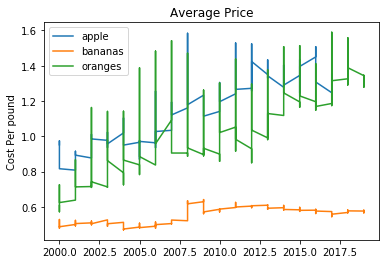

In [304]:
#graph=new_food[['year','value','item_name']]
#graph['value']
#apples['value']=pd.to_numeric(apples['value'],downcast='float')
#bananas['value']=pd.to_numeric(bananas['value'],downcast='float')
#oranges['value']=pd.to_numeric(oranges['value'],downcast='float')

#graph['value'].mean()
#list(new_food['item_name'].unique())
#graph.plot(x='year',y='value',label='item_name')
apples=new_food[new_food['item_name']=='Apples, Red Delicious, per lb. (453.6 gm)']
bananas=new_food[new_food['item_name']=='Bananas, per lb. (453.6 gm)']
oranges=new_food[new_food['item_name']=='Oranges, Navel, per lb. (453.6 gm)']

#plt.plot(x=list(new_food['year']),y=list(new_food['value']))
#print(apples)

plt.plot(apples['year'],apples['value'],label="apple")
plt.plot(bananas['year'],bananas['value'],label="bananas")
plt.plot(oranges['year'],oranges['value'],label="oranges")
plt.title('Average Price')
plt.ylabel('Cost Per pound')
plt.legend()


In [208]:
list(new_food)

['series_id',
 'year',
 'period',
 'value',
 'footnote_codes',
 'item_code',
 'item_name',
 'area',
 'season']

item_name  Apples, Red Delicious, per lb. (453.6 gm)  \
year                                                   
2000                                        0.918833   
2001                                        0.868417   
2002                                        0.947917   
2003                                        0.979750   
2004                                        1.042917   
2005                                        0.949417   
2006                                        1.066500   
2007                                        1.115250   
2008                                        1.319833   
2009                                        1.181583   
2010                                        1.220250   
2011                                        1.350333   
2012                                        1.377083   
2013                                        1.385909   
2014                                        1.353667   
2015                                        1.35

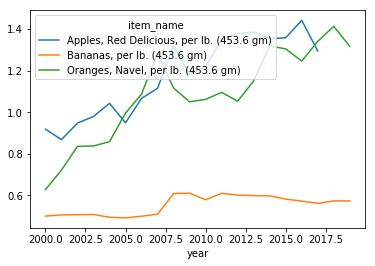

In [238]:
#new_food['value']=pd.to_numeric(new_food['value'],downcast="float")
q4=new_food.groupby(['year','item_name'])['value'].mean().unstack()
print(q4)

Text(0,0.5,'Cost Per Price')

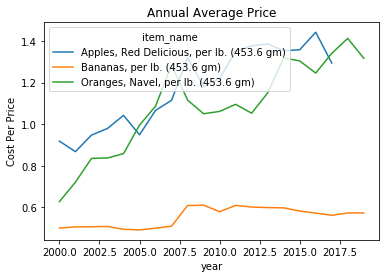

In [241]:
q4.plot()
plt.title("Annual Average Price")
plt.xlabel('year')
plt.ylabel('Cost Per Price')

In [252]:
list(new_food)

q5=new_food.groupby(['period','item_name'])['value'].mean().unstack()
print(q5)


item_name,"Apples, Red Delicious, per lb. (453.6 gm)","Bananas, per lb. (453.6 gm)","Oranges, Navel, per lb. (453.6 gm)"
period,,,
M01,1.128556,0.551900,0.963500
M02,1.143500,0.557250,0.969700
M03,1.138389,0.561850,0.961500
M04,1.138889,0.559850,0.967800
M05,1.160111,0.556789,1.007053
M06,1.187944,0.558158,1.111941
M07,1.220667,0.559158,1.285917
M08,1.254778,0.553210,1.390083
M09,1.247222,0.549316,1.396933


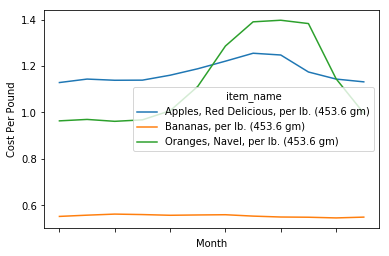

In [249]:
q5.plot()
plt.xlabel('Month')
plt.ylabel('Cost Per Pound')
plt.show()

In [251]:
list(q5)

['Apples, Red Delicious, per lb. (453.6 gm)',
 'Bananas, per lb. (453.6 gm)',
 'Oranges, Navel, per lb. (453.6 gm)']

In [255]:
diff=q5.diff()
diff

item_name,"Apples, Red Delicious, per lb. (453.6 gm)","Bananas, per lb. (453.6 gm)","Oranges, Navel, per lb. (453.6 gm)"
period,,,
M01,NaN,NaN,NaN
M02,0.014944,0.005350,0.006200
M03,-0.005111,0.004600,-0.008200
M04,0.000500,-0.002000,0.006300
M05,0.021222,-0.003061,0.039253
M06,0.027833,0.001368,0.104889
M07,0.032722,0.001000,0.173975
M08,0.034111,-0.005947,0.104167
M09,-0.007556,-0.003895,0.006850


In [260]:
diff.mean()

item_name
Apples, Red Delicious, per lb. (453.6 gm)    0.000270
Bananas, per lb. (453.6 gm)                 -0.000278
Oranges, Navel, per lb. (453.6 gm)           0.003012
dtype: float32

In [261]:
diff.std()

item_name
Apples, Red Delicious, per lb. (453.6 gm)    0.031938
Bananas, per lb. (453.6 gm)                  0.003701
Oranges, Navel, per lb. (453.6 gm)           0.115110
dtype: float32

In [262]:
diff.std(axis=1)

period
M01         NaN
M02    0.005311
M03    0.006679
M04    0.004258
M05    0.021233
M06    0.053781
M07    0.092086
M08    0.055734
M09    0.007487
M10    0.038456
M11    0.128491
M12    0.083336
dtype: float32

In [ ]:
#Question 7: Orange has the greatest spke in prices. Bananas has the least variability.

#It remains almost constant throughout the year

In [264]:
food.groupby(['area'])['value'].mean()

area
0000    0.931689
Name: value, dtype: float32

In [270]:
#food.groupby(['area'])['value'].mean()
type(food['value'])



pandas.core.series.Series

In [314]:
#food['value']=pd.to_numeric(food['value'],downcast='float')
food.iloc[63404,]=="-"

food=food.iloc[-63404,]



In [315]:
food.groupby(['area'])['value'].mean()


TypeError: 'str' object is not callable